# 1. Importing the libraries

In [2]:
# Importing essential libraries
import pandas as pd       # For data manipulation and analysis using DataFrames
import numpy as np        # For numerical computations, arrays, and mathematical functions
import seaborn as sns     # For statistical data visualization (heatmaps, pairplots, etc.)
import os                 # For interacting with the operating system (e.g., file paths)
import operator           # Provides efficient functions for standard operations (e.g., itemgetter)
import time               # For time-related functions, like tracking execution time
import matplotlib.pyplot as plt  # For general-purpose plotting

import tensorflow as tf   # For building and training deep learning models (CNNs, RNNs, etc.)

# Scikit-learn imports for machine learning tasks
from sklearn import datasets                # Preloaded datasets (like iris) for experimentation
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification models
from numpy import argmax                     # For finding the index of the maximum value in arrays
from sklearn.model_selection import train_test_split  # To split datasets into training and testing sets
from sklearn import metrics                  # For evaluating model performance (accuracy, confusion matrix, etc.)
from sklearn.tree import plot_tree           # For plotting decision trees
from sklearn import tree                     # Additional tree-related functionality
from sklearn.model_selection import GridSearchCV     # For exhaustive hyperparameter search
from scipy.stats import randint              # For defining integer distributions in RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV  # For random hyperparameter search

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings("ignore")

# Display all columns in pandas DataFrames (prevents truncation)
pd.set_option("display.max_columns", None)

# 2. Loading the datasets

In [9]:
# Ensure that all matplotlib charts are displayed directly within the Jupyter Notebook output cells
%matplotlib inline

In [11]:
# Configure pandas to display all columns in a DataFrame when printing, rather than truncating them
pd.set_option('display.max_columns', None)

In [13]:
# Define the file path to the folder containing the datasets
path = r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Specialization\Part 2\Exercise 2.4\Datasets'

In [17]:
# Load the weather prediction dataset from the specified path into a pandas DataFrame
# - os.path.join() ensures the file path works across different operating systems
# - index_col=False prevents pandas from using the first column as the index
df = pd.read_csv(os.path.join(path, 'Weather-prediction-dataset.csv'), index_col=False)

# Display the first few rows of the DataFrame
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017

In [19]:
# Load the pleasant weather dataset from the specified path into a pandas DataFrame
# - This dataset likely contains historical observations of "pleasant" weather conditions
# - os.path.join() ensures the file path works across different operating systems
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# Display the first few rows of the DataFrame to inspect the data
pleasantweather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Wrangling the data

In [22]:
# Filter the main dataset to include only observations from the 2010s
# - Convert the 'DATE' column to string format
# - Use str.startswith('201') to select rows where the year begins with '201' (i.e., 2010-2019)
dfdecade = df[df['DATE'].astype(str).str.startswith('201')]

# Display the resulting subset to verify the filtering
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,1.0054,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,8,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0250,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

In [24]:
# Filter the pleasant weather dataset to include only observations from the 2010s
# - Convert the 'DATE' column to string format
# - Use str.startswith('201') to select rows where the year begins with '201' (i.e., 2010-2019)
pleasant_decade = pleasantweather[pleasantweather['DATE'].astype(str).str.startswith('201')]

# Display the resulting subset to verify the filtering
pleasant_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Extract a list of weather station names from the dataset columns
# - Iterate through all column names in dfdecade
# - Check if the column name contains an underscore ('_')
# - Split the column name at the underscore and take the first part as the station name
# - Store all extracted station names in the list 'stations'
stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [28]:
# Create a set of unique weather station names
# - Convert the list 'stations' into a set to remove duplicates
# - Store the result in 'unique_stations'
# - Display the unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [30]:
# Create a dictionary to store the frequency of non-missing entries for each weather station
station_frequencies = {}

for station in unique_stations:
    # Select all columns in dfdecade that belong to the current station
    station_columns = [col for col in dfdecade.columns if col.startswith(station)]
    
    # Count the total number of non-missing (non-NaN) values across all selected columns
    # - dfdecade[station_columns].notna() returns a DataFrame of True/False for non-missing values
    # - .sum() applied once sums across rows, producing a Series
    # - .sum() again sums across the Series to get a single total count
    station_frequencies[station] = dfdecade[station_columns].notna().sum().sum()

# Print the frequency of non-missing entries for each weather station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
DEBILT: 32868 entries
BELGRADE: 32868 entries
SONNBLICK: 32868 entries
KASSEL: 32868 entries
OSLO: 32868 entries
BASEL: 32868 entries
HEATHROW: 32868 entries
STOCKHOLM: 32868 entries
VALENTIA: 32868 entries
MADRID: 32868 entries
BUDAPEST: 32868 entries
LJUBLJANA: 32868 entries
DUSSELDORF: 32868 entries
MUNCHENB: 32868 entries
MAASTRICHT: 32868 entries


In [32]:
# Drop columns that are not needed for modeling
# - 'DATE' and 'MONTH' may be irrelevant for certain machine learning models if you are using only the weather measurements as features.
# - axis=1 specifies that columns (not rows) are being dropped.
# - inplace=True updates dfdecade directly without creating a new DataFrame.
dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [34]:
# Check the dimensions of the DataFrame
# - dfdecade.shape returns a tuple (number of rows, number of columns)
# - Useful to confirm the size of the dataset after dropping columns or filtering
dfdecade.shape

(3652, 135)

In [36]:
# Drop the 'DATE' column from the pleasant_decade DataFrame
# - 'inplace=True' modifies the DataFrame directly without creating a copy
# - Useful to remove non-predictive or unnecessary columns before modeling
pleasant_decade.drop(columns='DATE', inplace=True)

In [38]:
# Display the shape of the pleasant_decade DataFrame
# - Returns a tuple (number of rows, number of columns)
# - Useful for quickly checking the size of the dataset after preprocessing
pleasant_decade.shape

(3652, 15)

# 4. Reshaping the data for modeling

In [41]:
# Assign the preprocessed dfdecade DataFrame to X
# - X will be used as the feature matrix for modeling
# - This separates the input features (X) from the target variable (y)
X = dfdecade

In [43]:
# Assign the preprocessed pleasant_decade DataFrame to y
# - y will be used as the target variable for modeling
# - This separates the output labels (y) from the input features (X)
y = pleasant_decade

In [45]:
# Convert X and y from pandas DataFrames to NumPy arrays
# - This is often required for compatibility with scikit-learn and TensorFlow models
# - X contains the feature data, and y contains the target labels
X = np.array(X)
y = np.array(y)

In [47]:
# Display the shape of the feature array X
# - This shows the number of samples (rows) and features (columns) in the dataset
X.shape

(3652, 135)

In [49]:
# Display the shape of the target array y
# - This shows the number of samples (rows) in the target variable
# - Ensures it aligns with X for model training
y.shape

(3652, 15)

# 5. Splitting the data

In [52]:
# Split the dataset into training and testing sets
# - X_train, y_train: used to train the model
# - X_test, y_test: used to evaluate model performance
# - random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
# Print the shapes of the training and testing sets
# - X_train.shape / y_train.shape: shows the number of samples and features in the training set
# - X_test.shape / y_test.shape: shows the number of samples and features in the testing set
# This helps verify that the split occurred as expected
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


# 6. Optimizing the hyperparameters

In [57]:
# Instantiate a Random Forest classifier object
# - clf will hold the model and its hyperparameters (currently set to defaults)
# - This object can later be trained on the training data using clf.fit()
clf = RandomForestClassifier()

In [59]:
# Define the hyperparameter search space for GridSearchCV
# - grid_space is a dictionary where keys are the hyperparameters of the Random Forest
# - Values are lists specifying the candidate options to try during the grid search
# Hyperparameters included:
#   max_depth: Maximum depth of each tree (None means unlimited depth)
#   n_estimators: Number of trees in the forest
#   max_features: Number of features to consider when looking for the best split
#   min_samples_leaf: Minimum number of samples required to be at a leaf node
#   min_samples_split: Minimum number of samples required to split an internal node
grid_space = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200],
    'max_features': [15, 50, 100, 135],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3]
}

In [61]:
# Record the start time to measure how long the grid search takes
start = time.time()

# Initialize GridSearchCV for hyperparameter tuning
# - clf: the Random Forest classifier to be optimized
# - param_grid: the dictionary of hyperparameters to search (grid_space)
# - cv: number of folds for cross-validation (3-fold CV)
# - scoring: evaluation metric, here using 'accuracy'
# - verbose: level of output during fitting (3 gives detailed messages)
# - n_jobs: number of parallel jobs (-1 uses all available cores)
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
model_grid = grid.fit(X_train, y_train)

# Print the total time taken for the grid search in minutes
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 30.72858347892761 minutes


In [63]:
# Print the results of the grid search

# model_grid.best_params_ contains the combination of hyperparameters that gave the highest cross-validated accuracy during the grid search
print('Best GRID search hyperparameters are: ' + str(model_grid.best_params_))

# model_grid.best_score_ gives the best mean cross-validated accuracy achieved with the best hyperparameter combination
print('Best GRID search score is: ' + str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.6440306681270537


# Random search

In [66]:
# Define the hyperparameter space for Randomized Search CV

# rs_space is a dictionary specifying the range of hyperparameters that RandomizedSearchCV will sample from randomly during optimization

rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],  
    # Maximum depth of each tree; includes a range from 10 to 90 in steps of 10, plus None for unlimited depth
    
    'n_estimators': np.arange(150, 250, step=25),  
    # Number of trees in the forest; focuses on values around a previously observed good range
    
    'max_features': randint(30, 70),  
    # Number of features to consider when looking for the best split; uses a random integer distribution
    
    'criterion': ['gini', 'entropy'],  
    # Function to measure split quality; can be 'gini' or 'entropy'
    
    'min_samples_leaf': randint(1, 4),  
    # Minimum number of samples required to be at a leaf node; random integers from 1 to 3
    
    'min_samples_split': np.arange(2, 10, step=2)  
    # Minimum number of samples required to split an internal node; even numbers from 2 to 8
}

In [68]:
# Instantiate a new Random Forest classifier

# clf2 is a fresh RandomForestClassifier object with default settings.
# This classifier will be used in the RandomizedSearchCV for hyperparameter tuning,
# separate from the previous GridSearchCV classifier (clf).
clf2 = RandomForestClassifier()

In [72]:
# Start timing to measure how long the random search takes
start = time.time()

# Set up a RandomizedSearchCV for the Random Forest classifier:
# - clf2: the Random Forest model to tune
# - rs_space: dictionary defining the hyperparameter ranges to sample from
# - n_iter=10: number of random combinations of hyperparameters to try
# - scoring='accuracy': use accuracy as the performance metric
# - verbose=3: print detailed progress messages during the search
# - n_jobs=-1: use all available CPU cores to speed up computation
# - cv=3: use 3-fold cross-validation for evaluating each combination

rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)

# Fit the RandomizedSearchCV object on the training data to find the best hyperparameters
model_random = rf_random.fit(X_train, y_train)

# Print the total time taken for the search in minutes
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 3.678756586710612 minutes


In [74]:
# Compare and display the results of Grid Search and Randomized Search
# Grid Search results:
#   - model_grid.best_params_: shows the combination of hyperparameters that achieved the highest cross-validated score
#   - model_grid.best_score_: shows the best accuracy score obtained during Grid Search
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Randomized Search results:
#   - model_random.best_params_: shows the best hyperparameters found in Randomized Search
#   - model_random.best_score_: shows the corresponding cross-validated accuracy score
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.6440306681270537
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 44, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 175}
Best RANDOM search score is: 0.6330777656078861


# 7. Running the random forest algoritm with the optimized search parameters

In [79]:
# Create a Random Forest classifier using the optimized hyperparameters from GridSearch
clf3 = RandomForestClassifier(
    n_estimators=200,       # Total number of trees in the forest. More trees usually improve performance but increase computation time.
    max_depth=None,         # Maximum depth of each tree. None means nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples.
    max_features=50,        # Number of features to consider when looking for the best split at each node. Limits complexity and can reduce overfitting.
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node. Smaller values allow trees to learn finer details but may overfit.
    min_samples_split=3     # Minimum number of samples required to split an internal node. Higher values can reduce overfitting by limiting tree growth.
)

# Train the Random Forest model on the training dataset
# The fit() function learns patterns in X_train and y_train to build the ensemble of decision trees.
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, min_samples_split=3, n_estimators=200)

In [81]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6615553121577218


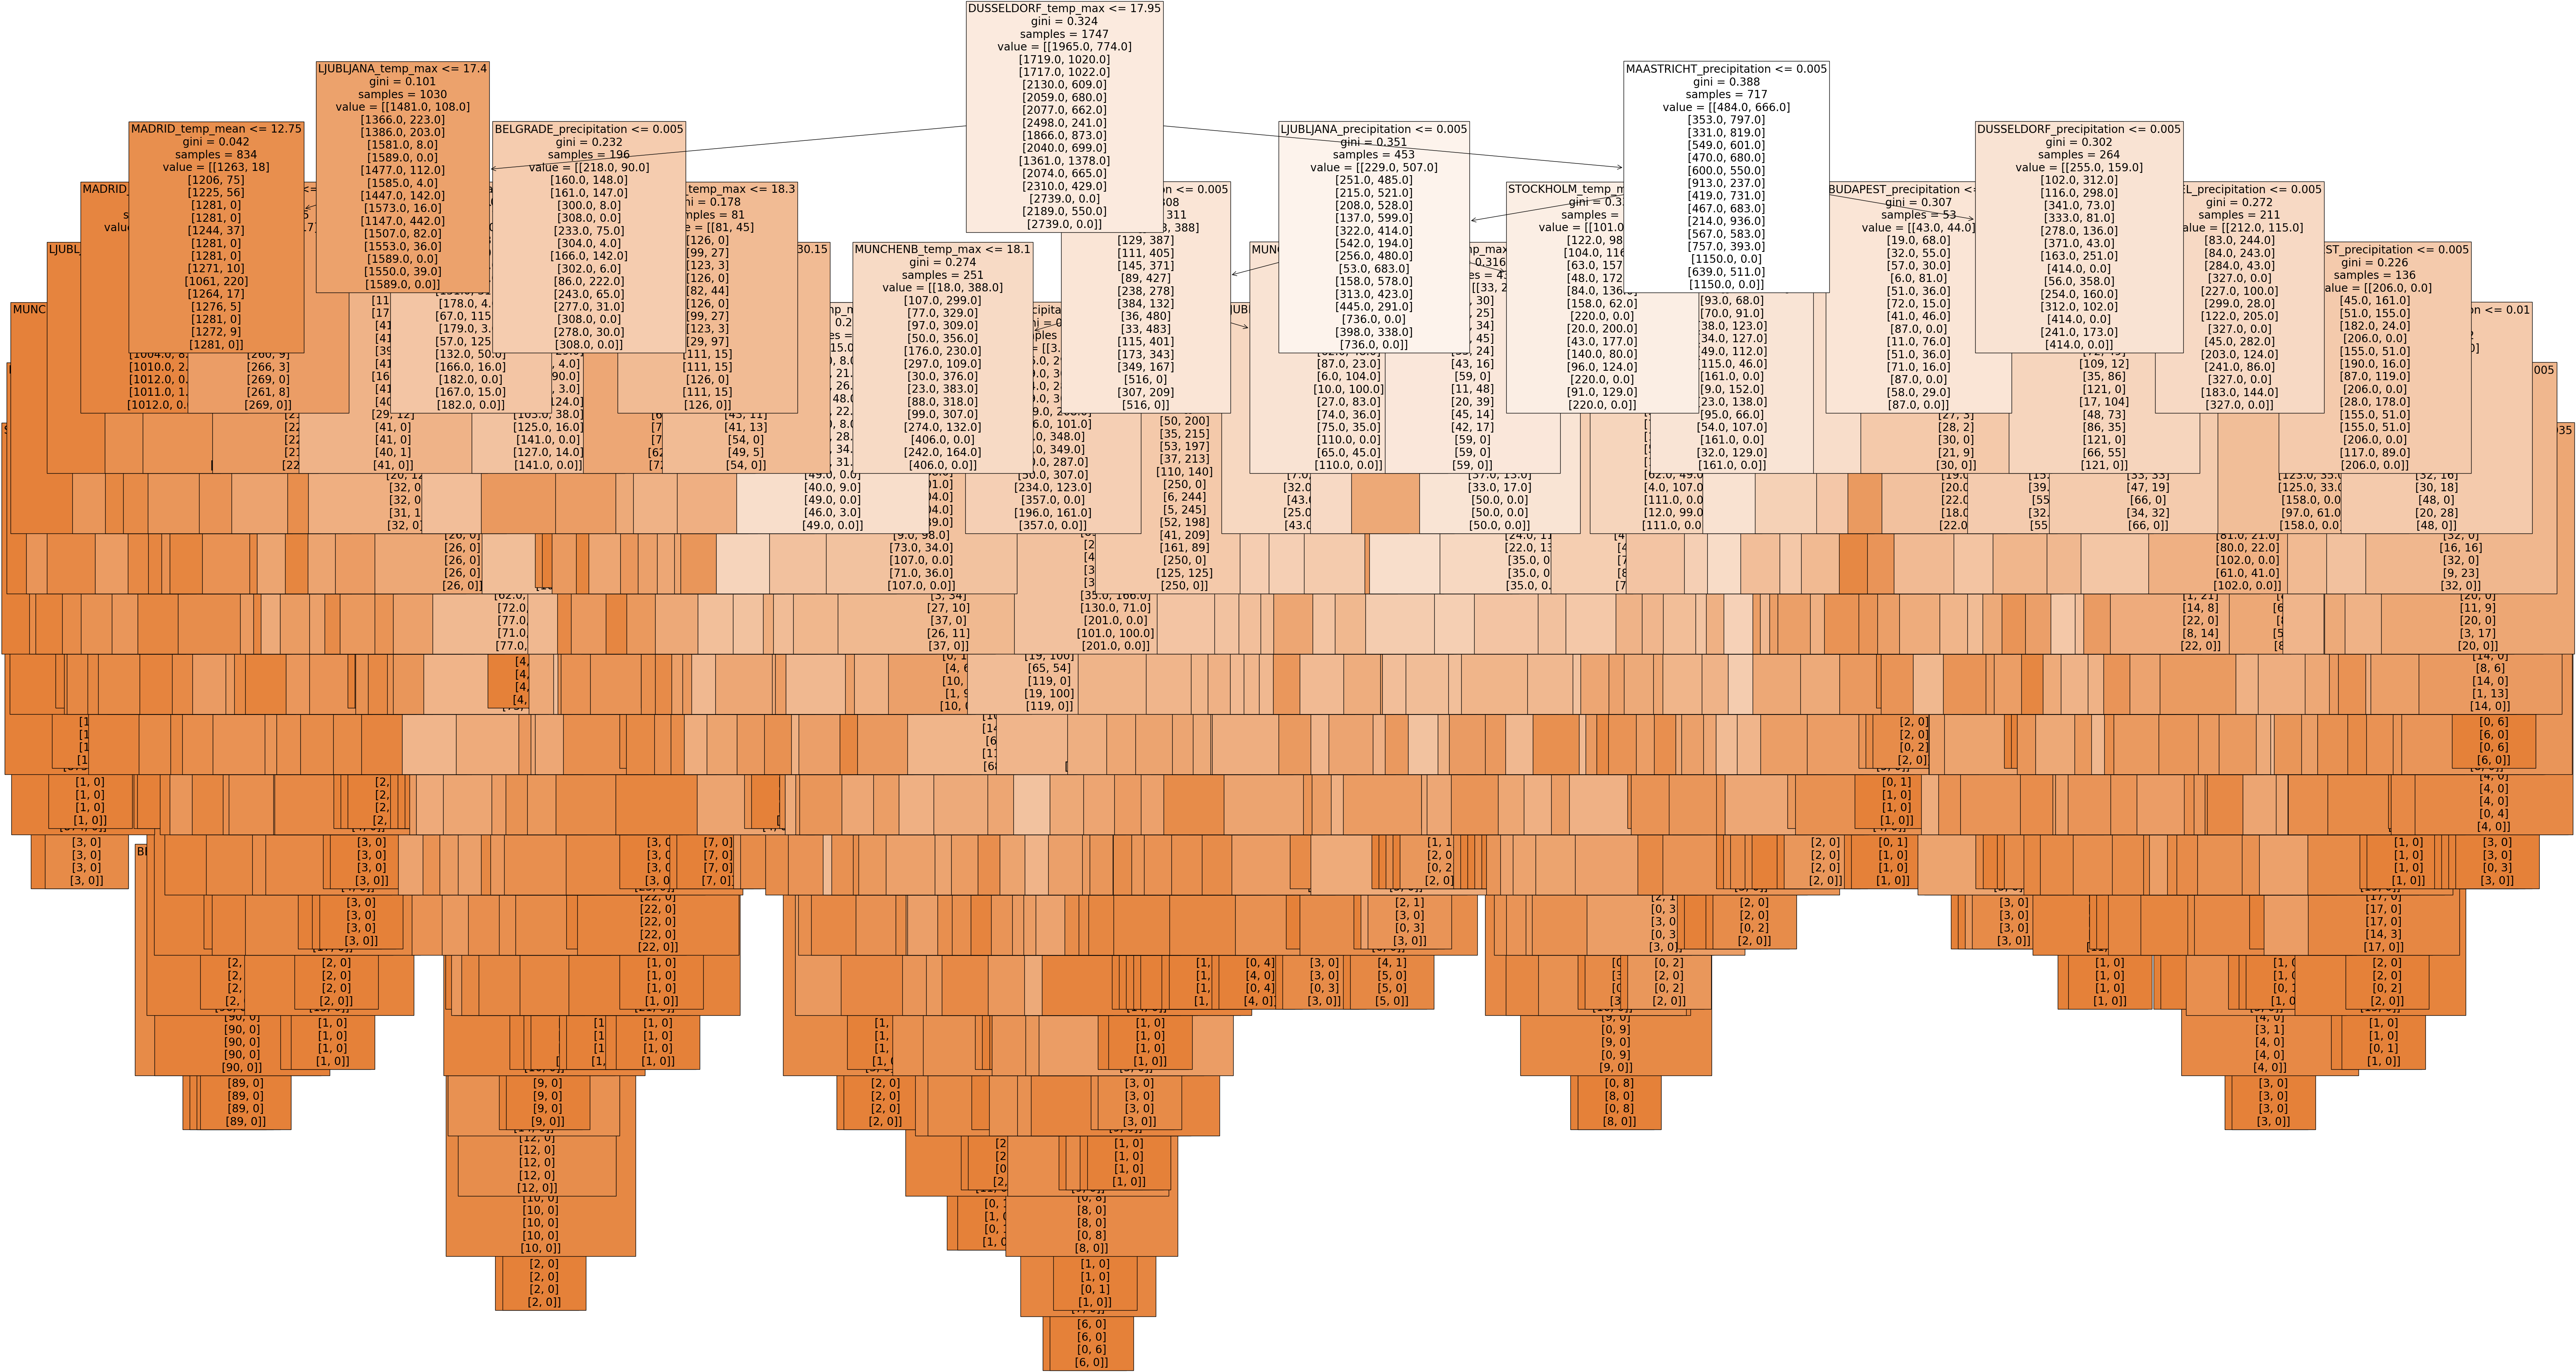

In [83]:
# Create a large figure for plotting the decision tree
fig = plt.figure(figsize=(80,40))  # Very large figure to accommodate deep trees

# Plot a single tree from the Random Forest
plot_tree(
    clf3.estimators_[15],          # Select the 16th tree in the ensemble
    fontsize = 20,                 # Large font for readability
    feature_names = dfdecade.columns,  # Use column names from the dataset as labels
    class_names=['unpleasant', 'pleasant'],  # Label the classes at leaf nodes
    filled=True                     # Fill nodes with colors based on class
)

# Display the tree plot
plt.show()  # Render the plot inline in the notebook

In [85]:
# Save the figure of the decision tree to a file
fig.savefig(
    os.path.join(path, 'optimized_random_forest_2010s.png'),  # Full path and filename for saving
    bbox_inches='tight'  # Adjusts bounding box so the entire tree fits nicely without extra whitespace
)

# 7. Uncovering feature importances

In [88]:
# Retrieve feature importances from the trained Random Forest model
# - Each value represents how much a feature contributes to reducing impurity across all trees
newarray = clf3.feature_importances_

# Print the shape (i.e., number of importance scores = number of features)
print(clf3.feature_importances_.shape)

# Display the array of importance values for all features
newarray

(135,)


array([1.42244518e-03, 2.24266210e-03, 1.95999206e-03, 2.11458391e-03,
       3.10737763e-02, 4.05769821e-03, 1.04466964e-02, 1.88636338e-03,
       9.26645279e-02, 2.83482027e-03, 2.33026609e-03, 2.21605359e-03,
       1.77324461e-03, 2.84907131e-02, 2.05110975e-03, 3.53988711e-03,
       1.99803765e-03, 8.14789288e-03, 2.46229371e-04, 0.00000000e+00,
       0.00000000e+00, 7.61243111e-04, 2.60868911e-02, 7.56093528e-04,
       8.34926509e-03, 1.88942605e-03, 1.93013997e-02, 1.34586180e-03,
       1.81366436e-03, 2.11146737e-03, 2.45124370e-03, 2.01351310e-02,
       2.47949635e-03, 2.13931239e-03, 1.90571009e-03, 2.61274898e-02,
       1.06290281e-03, 1.57692889e-03, 2.03238664e-03, 1.97127712e-03,
       3.64568082e-02, 2.42091812e-03, 1.31291897e-02, 1.59415552e-03,
       1.07947277e-01, 1.76784461e-03, 2.84921629e-03, 2.09412396e-03,
       3.19876746e-03, 1.39233332e-02, 3.54429131e-03, 2.61872316e-03,
       1.80308739e-03, 8.96763174e-03, 1.74630075e-03, 1.66995664e-03,
      

In [90]:
# Reshape the feature importances array into a 3D structure
# - Original `newarray` is 1D (one importance value per feature).
# - reshape(-1, 15, 9) organizes it into:
#     * -1 → infer the first dimension automatically based on total size
#     * 15 → likely corresponds to the number of stations
#     * 9  → likely corresponds to the number of weather variables per station
newarray = newarray.reshape(-1, 15, 9)

# Print the new shape to confirm restructuring
print(newarray.shape)

# Display the reshaped array
newarray

(1, 15, 9)


array([[[1.42244518e-03, 2.24266210e-03, 1.95999206e-03, 2.11458391e-03,
         3.10737763e-02, 4.05769821e-03, 1.04466964e-02, 1.88636338e-03,
         9.26645279e-02],
        [2.83482027e-03, 2.33026609e-03, 2.21605359e-03, 1.77324461e-03,
         2.84907131e-02, 2.05110975e-03, 3.53988711e-03, 1.99803765e-03,
         8.14789288e-03],
        [2.46229371e-04, 0.00000000e+00, 0.00000000e+00, 7.61243111e-04,
         2.60868911e-02, 7.56093528e-04, 8.34926509e-03, 1.88942605e-03,
         1.93013997e-02],
        [1.34586180e-03, 1.81366436e-03, 2.11146737e-03, 2.45124370e-03,
         2.01351310e-02, 2.47949635e-03, 2.13931239e-03, 1.90571009e-03,
         2.61274898e-02],
        [1.06290281e-03, 1.57692889e-03, 2.03238664e-03, 1.97127712e-03,
         3.64568082e-02, 2.42091812e-03, 1.31291897e-02, 1.59415552e-03,
         1.07947277e-01],
        [1.76784461e-03, 2.84921629e-03, 2.09412396e-03, 3.19876746e-03,
         1.39233332e-02, 3.54429131e-03, 2.61872316e-03, 1.80308739

In [92]:
# Collapse the 3D feature importance array into one importance value per weather station
# - newarray[0] → selects the first "observation" (since the first dimension was -1 in the reshape)
# - axis=1 → sums across the 9 weather variables for each station
# The result is a 1D array with 15 values (one total importance score per station)
sumarray = np.sum(newarray[0], axis=1)

# Display the collapsed array of station-level importances
sumarray

array([0.14786875, 0.05338203, 0.05739055, 0.06050938, 0.16819184,
       0.04076702, 0.02650676, 0.07138916, 0.1411378 , 0.07366461,
       0.06081149, 0.0424822 , 0.01611181, 0.03688997, 0.00289664])

In [94]:
# Extract a list of weather station names from the dataframe's column names
# - col.split('_')[0] → splits each column name at the underscore and takes the first part (the station name)
# - for col in dfdecade.columns if '_' in col → only process columns that contain an underscore
# Example: "BERLIN_temp_max" → "BERLIN"
stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

# The result is a list of station identifiers corresponding to the features in dfdecade
stations

['BASEL',
 'BASEL',
 'BASEL',
 'BASEL',
 'BASEL',
 'BASEL',
 'BASEL',
 'BASEL',
 'BASEL',
 'BELGRADE',
 'BELGRADE',
 'BELGRADE',
 'BELGRADE',
 'BELGRADE',
 'BELGRADE',
 'BELGRADE',
 'BELGRADE',
 'BELGRADE',
 'BUDAPEST',
 'BUDAPEST',
 'BUDAPEST',
 'BUDAPEST',
 'BUDAPEST',
 'BUDAPEST',
 'BUDAPEST',
 'BUDAPEST',
 'BUDAPEST',
 'DEBILT',
 'DEBILT',
 'DEBILT',
 'DEBILT',
 'DEBILT',
 'DEBILT',
 'DEBILT',
 'DEBILT',
 'DEBILT',
 'DUSSELDORF',
 'DUSSELDORF',
 'DUSSELDORF',
 'DUSSELDORF',
 'DUSSELDORF',
 'DUSSELDORF',
 'DUSSELDORF',
 'DUSSELDORF',
 'DUSSELDORF',
 'HEATHROW',
 'HEATHROW',
 'HEATHROW',
 'HEATHROW',
 'HEATHROW',
 'HEATHROW',
 'HEATHROW',
 'HEATHROW',
 'HEATHROW',
 'KASSEL',
 'KASSEL',
 'KASSEL',
 'KASSEL',
 'KASSEL',
 'KASSEL',
 'KASSEL',
 'KASSEL',
 'KASSEL',
 'LJUBLJANA',
 'LJUBLJANA',
 'LJUBLJANA',
 'LJUBLJANA',
 'LJUBLJANA',
 'LJUBLJANA',
 'LJUBLJANA',
 'LJUBLJANA',
 'LJUBLJANA',
 'MAASTRICHT',
 'MAASTRICHT',
 'MAASTRICHT',
 'MAASTRICHT',
 'MAASTRICHT',
 'MAASTRICHT',
 'MAASTRIC

In [96]:
# Create a set of unique station names
# - 'stations' is a list that may contain duplicates (e.g., BERLIN appearing multiple times for temp, humidity, etc.)
# - Using set(stations) removes duplicates automatically, since sets only store unique elements
unique_stations = set(stations)

# Display the resulting set of unique station names
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [98]:
# Convert the set of unique stations into a list
# - 'unique_stations' is currently a Python set, which is unordered
# - Converting it to a list makes it easier to work with (e.g., indexing, slicing, or iterating in a consistent order)
unique_stations_list = list(unique_stations)

# Now 'unique_stations_list' contains the unique station names in list form

In [100]:
# Create a pandas Series where:
# - 'sumarray' contains the aggregated feature importance scores (one value per station)
# - 'unique_stations_list' provides the labels (station names) to use as the index
important = pd.Series(sumarray, index=unique_stations_list)

# Sort the Series in descending order
# - The most important stations (highest feature importance scores) will appear first
important = important.sort_values(ascending=False)

# Display the sorted feature importances
important

OSLO          0.168192
DEBILT        0.147869
VALENTIA      0.141138
MADRID        0.073665
STOCKHOLM     0.071389
BUDAPEST      0.060811
KASSEL        0.060509
SONNBLICK     0.057391
BELGRADE      0.053382
LJUBLJANA     0.042482
BASEL         0.040767
MUNCHENB      0.036890
HEATHROW      0.026507
DUSSELDORF    0.016112
MAASTRICHT    0.002897
dtype: float64

In [102]:
# Create a DataFrame that links each weather station to its corresponding importance score
# - 'Weather Station': names of the stations (from unique_stations_list)
# - 'Importance': aggregated importance values (from sumarray)
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

# Sort the DataFrame by the 'Importance' column in descending order
# - The most important stations (higher feature importance values) will appear at the top
df_importance = df_importance.sort_values(by='Importance', ascending=False)

['DEBILT', 'BELGRADE', 'SONNBLICK', 'KASSEL', 'OSLO', 'BASEL', 'HEATHROW', 'STOCKHOLM', 'VALENTIA', 'MADRID', 'BUDAPEST', 'LJUBLJANA', 'DUSSELDORF', 'MUNCHENB', 'MAASTRICHT']


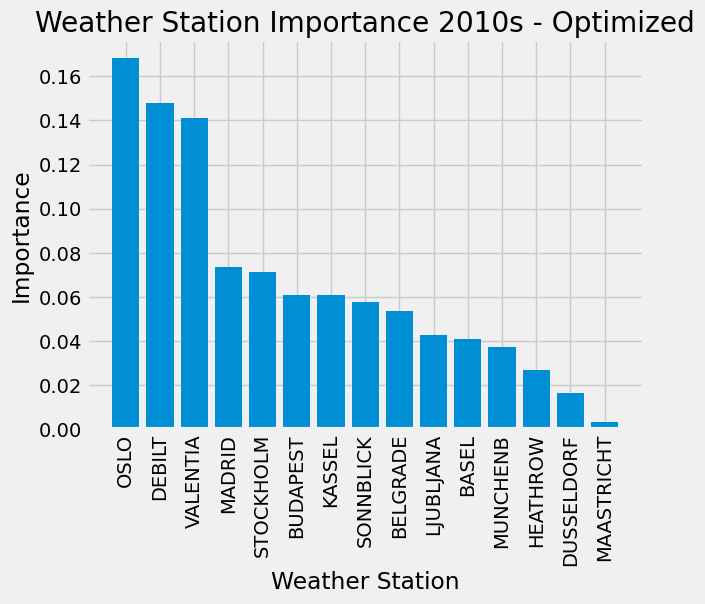

In [104]:
# Plot the results of feature importance by weather station

%matplotlib inline   
# Ensures plots are displayed directly inside the Jupyter Notebook

plt.style.use('fivethirtyeight')  # Apply a clean and modern plotting style
print(unique_stations_list)       # Print the list of unique station names for verification/debugging

# Create a vertical bar chart showing importance per weather station
plt.bar(
    df_importance['Weather Station'],   # X-axis: station names
    df_importance['Importance'],        # Y-axis: corresponding importance values
    orientation='vertical'              # Bars are vertical (default, but explicitly stated)
)

# Format the x-axis for readability
plt.xticks(rotation='vertical')   # Rotate station names so they don’t overlap
plt.xlabel('Weather Station')     # Label for the x-axis
plt.ylabel('Importance')          # Label for the y-axis
plt.title('Weather Station Importance 2010s - Optimized')  # Plot title

# Save the figure to a file
# - 'path' is the directory where the file will be saved
# - 'bbox_inches="tight"' ensures labels/titles are not cut off
plt.savefig(os.path.join(path, 'optimized_featureimportance_2010s.png'), bbox_inches='tight')

# Display the plot in the notebook
plt.show()

# Random forest for Oslo data for all years

In [107]:
# Filter the weather dataset to only include columns related to Oslo

# Explanation:
# - df.columns.astype(str): converts all column names to strings (ensures compatibility in case of mixed types).
# - .str.startswith('OSLO'): checks which columns start with "OSLO".
# - df.columns[...]: returns only the matching column names.
# - df[...] : subsets the dataframe to include only these columns.

df_oslo = df[df.columns[df.columns.astype(str).str.startswith('OSLO')]] 

# Display the filtered dataframe to confirm it contains only Oslo-related columns
df_oslo

,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9
1,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9
2,8,0.69,1.0234,0.04,0.08,0.0,1.9,0.6,3.1
3,8,0.98,1.0244,0.04,0.35,0.0,3.0,0.4,4.9
4,8,0.96,1.0092,0.05,0.26,0.0,3.7,2.9,4.9
...,...,...,...,...,...,...,...,...,...
22945,8,0.98,1.0139,1.06,0.21,0.1,9.7,5.8,12.0
22946,8,1.00,1.0107,1.06,0.21,0.0,10.9,8.8,11.7
22947,3,0.85,1.0082,1.06,0.21,6.8,9.7,7.7,14.2
22948,5,0.94,1.0150,1.06,0.21,2.9,5.9,2.1,8.1


In [109]:
# Filter the pleasant weather dataset to only include columns related to Oslo

# Explanation:
# - pleasantweather.columns.astype(str): ensures all column names are treated as strings.
# - .str.startswith('OSLO'): selects only columns whose names start with "OSLO".
# - pleasantweather.columns[...] : returns the matching column names.
# - pleasantweather[...] : subsets the dataframe to include only the Oslo-related columns.

pleasant_oslo = pleasantweather[pleasantweather.columns[pleasantweather.columns.astype(str).str.startswith('OSLO')]] 

# Display the filtered dataframe to confirm it contains only Oslo-related columns
pleasant_oslo

,OSLO_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [111]:
# Create target vector for Oslo by collapsing multiple columns into a single label per observation

# Explanation:
# - pleasant_oslo: DataFrame containing only Oslo-related pleasant weather indicators
# - .max(axis=1): for each row, take the maximum value across all columns
#   This effectively converts multiple columns into a single binary label per observation.
#   For example, if any column indicates "pleasant" (e.g., value = 1), the row is labeled as pleasant.
# - y2: resulting 1-dimensional array (or Series) of target labels for Oslo
# - y2.shape: shows the number of observations (rows) in the target vector

y2 = pleasant_oslo.max(axis=1)

y2.shape

(22950,)

In [113]:
# Ensure y2 is a 1-dimensional NumPy array suitable for model training

# Explanation:
# - y2.to_numpy(): converts the pandas Series to a NumPy array, which is often required by scikit-learn
# - .reshape(-1): flattens the array to a single dimension, ensuring the shape is (n_samples,)
#   This is important because classifiers expect the target vector to be 1D, not 2D
# - y2.shape: confirms the final shape of the target vector

y2 = y2.to_numpy().reshape(-1)

y2.shape

(22950,)

In [115]:
# Convert the Oslo feature dataframe to a NumPy array for model training

# Explanation:
# - df_oslo.to_numpy(): converts the pandas DataFrame to a NumPy array, which is required by scikit-learn models
# - X2.shape: prints the shape of the feature matrix, showing the number of samples (rows) and features (columns)
# - y2.shape: prints the shape of the target vector to ensure it aligns with X2
#   This check ensures that the number of samples in X2 matches the number of labels in y2, avoiding shape mismatch errors

X2 = df_oslo.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [117]:
# Convert the Oslo feature and target matrices to NumPy arrays

# Explanation:
# - X2 and y2 are already in array-like formats, but explicitly converting them with np.array ensures they are proper NumPy arrays.
# - X will hold the features for the Oslo weather station (shape: [n_samples, n_features]).
# - y will hold the target labels for the Oslo weather station (shape: [n_samples,]).
# - NumPy arrays are required for scikit-learn model training and manipulation.

X = np.array(X2)
y = np.array(y2)

In [119]:
# Check the shape of the feature matrix X

# Explanation:
# - X.shape returns a tuple representing the dimensions of the NumPy array X.
# - The first value is the number of samples (rows), i.e., the number of observations for Oslo.
# - The second value is the number of features (columns), i.e., the number of weather measurements per observation.
# - This helps confirm that the feature matrix has the expected dimensions before training a model.

X.shape

(22950, 9)

In [121]:
# Check the shape of the target array y

# Explanation:
# - y.shape returns a tuple representing the dimensions of the NumPy array y.
# - The first value is the number of samples (rows), i.e., the number of observations for Oslo.
# - Since y is a 1D array of target labels (pleasant/unpleasant), there is no second value for features.
# - This ensures that the target vector aligns with X in terms of the number of observations before model training.

y.shape

(22950,)

In [123]:
# Split the dataset into training and testing sets

# Explanation:
# - train_test_split randomly splits the feature matrix X and target vector y into training and testing subsets.
# - X_train and y_train: Used to train the model.
# - X_test and y_test: Used to evaluate model performance on unseen data.
# - random_state=42 ensures reproducibility, so the same split occurs each time this code runs.
# - By default, train_test_split uses a 75/25 split (75% training, 25% testing) unless specified otherwise.
# - This step is essential to prevent overfitting and to validate the model's generalization ability.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
# Display the shapes of the training and testing datasets

# Explanation:
# - X_train.shape and y_train.shape show the number of observations and features in the training set.
# - X_test.shape and y_test.shape show the number of observations and features in the testing set.
# - Printing these shapes helps verify that the split worked correctly and gives an overview of dataset size before modeling.
# - It is also useful for debugging dimension mismatches before feeding data into a model.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [127]:
# Display the training feature set

# Explanation:
# - X_train contains the features (input variables) for the training dataset after the train-test split.
# - Each row represents one observation (day), and each column represents one feature (e.g., weather measurement).
# - Viewing X_train helps verify the data has been loaded and preprocessed correctly before training a model.
X_train

array([[  2.    ,   0.48  ,   1.0207, ...,  10.5   ,   6.2   ,  16.5   ],
       [  4.    ,   0.88  ,   1.0101, ..., -11.2   , -13.8   ,  -8.2   ],
       [  4.    ,   0.77  ,   1.0202, ..., -14.4   , -19.    , -11.7   ],
       ...,
       [  8.    ,   0.72  ,   1.0083, ...,   6.4   ,   5.2   ,   9.5   ],
       [  8.    ,   0.78  ,   1.0115, ...,   8.6   ,   6.5   ,  11.4   ],
       [  3.    ,   0.48  ,   1.0173, ...,   4.4   ,  -1.6   ,   9.6   ]])

In [129]:
# Display the training target values

# Explanation:
# - y_train contains the target labels (output variable) for the training dataset after the train-test split.
# - Each entry corresponds to the label for the respective row in X_train.
# - Viewing y_train helps verify that the target data aligns correctly with the training features and is in the expected format for model training.
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
# Display the test feature set

# Explanation:
# - X_test contains the features for the test dataset after the train-test split.
# - These are the input variables that will be used to evaluate the trained model’s performance.
# - Inspecting X_test can help ensure that the features are correctly formatted and match the expected structure of X_train.
X_test

array([[ 6.    ,  0.85  ,  0.9968, ..., 13.1   ,  9.4   , 20.    ],
       [ 5.    ,  0.71  ,  1.0352, ..., -4.5   , -6.    , -1.6   ],
       [ 8.    ,  0.87  ,  0.9991, ..., 14.7   , 13.9   , 16.2   ],
       ...,
       [ 8.    ,  0.89  ,  1.0196, ...,  8.    ,  6.9   ,  9.    ],
       [ 3.    ,  0.75  ,  1.0173, ..., -0.9   , -6.    ,  4.6   ],
       [ 4.    ,  0.54  ,  1.0126, ..., 11.4   ,  5.6   , 15.1   ]])

In [133]:
# Display the test target values

# Explanation:
# - y_test contains the target labels for the test dataset after the train-test split.
# - These are the actual outcomes corresponding to X_test, which the model will try to predict.
# - Inspecting y_test ensures that the target values are correctly aligned with the test features and properly formatted.
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Optimization of hyperparameters 

In [136]:
# Create a Random Forest classifier instance

# Explanation:
# - clf is an object of the RandomForestClassifier class from scikit-learn.
# - At this point, no hyperparameters are set, so the model will use default settings.
# - This classifier can be trained on the training data using the fit() method to learn patterns.
clf = RandomForestClassifier()

In [138]:
# Define the hyperparameter grid for GridSearchCV

# Explanation:
# - grid_space is a dictionary specifying the values to test for each hyperparameter of the Random Forest.
# - 'max_depth': maximum depth of each tree; None means nodes are expanded until all leaves are pure.
# - 'n_estimators': number of trees in the forest to test.
# - 'max_features': number of features considered for splitting at each node.
# - 'min_samples_leaf': minimum number of samples required at a leaf node.
# - 'min_samples_split': minimum number of samples required to split an internal node.
# - GridSearchCV will train a model for every combination of these hyperparameters to find the best set.
grid_space = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3]
}

In [140]:
# Start a timer to measure how long the grid search takes
start = time.time()

# Initialize GridSearchCV
# Explanation:
# - clf: the Random Forest classifier to optimize
# - param_grid: the hyperparameter grid to search over (grid_space)
# - cv=3: use 3-fold cross-validation to evaluate each combination
# - scoring='accuracy': use accuracy as the evaluation metric
# - verbose=3: print detailed logs of the search progress
# - n_jobs=-1: use all available CPU cores to speed up computation
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
model_grid = grid.fit(X_train, y_train)

# Print the total time taken for the grid search in minutes
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 2.8669511755307515 minutes


In [142]:
# Display the results of the Grid Search

# model_grid.best_params_ contains the combination of hyperparameters that achieved the highest accuracy
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))

# model_grid.best_score_ contains the corresponding mean cross-validated accuracy for the best hyperparameters
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


# Random search

In [145]:
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  # Depths from 1 to 9, plus None for unlimited
    'n_estimators': np.arange(100, 300, step=50),          # Number of trees: 100, 150, 200, 250
    'max_features': randint(2, 5),                         # Randomly pick number of features between 2 and 4
    'criterion': ['gini', 'entropy'],                      # Split quality measures
    'min_samples_leaf': randint(1, 4),                     # Randomly pick minimum samples per leaf: 1-3
    'min_samples_split': np.arange(2, 10, step=2)          # Minimum samples required to split: 2,4,6,8
}

In [147]:
# Create a new Random Forest classifier instance
# This classifier will be used for hyperparameter optimization using RandomizedSearchCV
clf2 = RandomForestClassifier()

In [149]:
# Start a timer to measure how long the random search takes
start = time.time()

# Set up RandomizedSearchCV for hyperparameter tuning
# clf2: the Random Forest classifier to optimize
# rs_space: dictionary defining the hyperparameter search space
# n_iter=100: number of random combinations to try
# scoring='accuracy': evaluate models based on accuracy
# verbose=3: print progress messages
# n_jobs=-1: use all available CPU cores for computation
# cv=5: perform 5-fold cross-validation on each hyperparameter combination
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)

# Fit the RandomizedSearchCV object to the training data
# This will perform the random hyperparameter search and train multiple models
model_random = rf_random.fit(X_train, y_train)

# Print the elapsed time in minutes
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 2.6502907395362856 minutes


In [151]:
# Display the results of the random search

# Print the hyperparameter combination that achieved the highest cross-validated accuracy
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))

# Print the best cross-validated accuracy score achieved during the random search
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
Best RANDOM search score is: 1.0


In [153]:
# Compare results from Grid Search and Randomized Search

# Grid Search results:
# Print the hyperparameter combination that gave the highest accuracy in Grid Search
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))

# Print the best cross-validated accuracy score achieved with Grid Search
print('Best GRID search score is: '+str(model_grid.best_score_))

# Randomized Search results:
# Print the hyperparameter combination that gave the highest accuracy in Randomized Search
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))

# Print the best cross-validated accuracy score achieved with Randomized Search
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
Best RANDOM search score is: 1.0


# Running the random forest algoritm with the optimized search parameters

In [158]:
clf3 = RandomForestClassifier(
    n_estimators=250,       # Sets the number of trees in the forest. More trees can improve accuracy but increase computation time.
    max_depth=7,            # Limits the maximum depth of each tree. Restricting depth helps prevent overfitting.
    max_features=2,         # Specifies the number of features to consider when looking for the best split at each node.
    min_samples_leaf=2,     # Minimum number of samples required to be at a leaf node. Prevents leaves with very few samples, which can reduce overfitting.
    min_samples_split=2,    # Minimum number of samples required to split an internal node.
    criterion='gini'        # Measures the quality of a split using the Gini impurity.
)

# Training the model on the training dataset
# The fit() function learns patterns in X_train and y_train to build the ensemble of decision trees.
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2,
                       n_estimators=250)

In [160]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)  
# The predict() method uses the trained Random Forest model (clf3) to make predictions 
# on the test features (X_test). It outputs the predicted labels for each observation.

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))
# metrics.accuracy_score() compares the predicted labels (y_pred3) with the true labels (y_test)
# to calculate the proportion of correct predictions. This gives a straightforward measure 
# of how well the model performs on unseen data.

Model Accuracy:  1.0


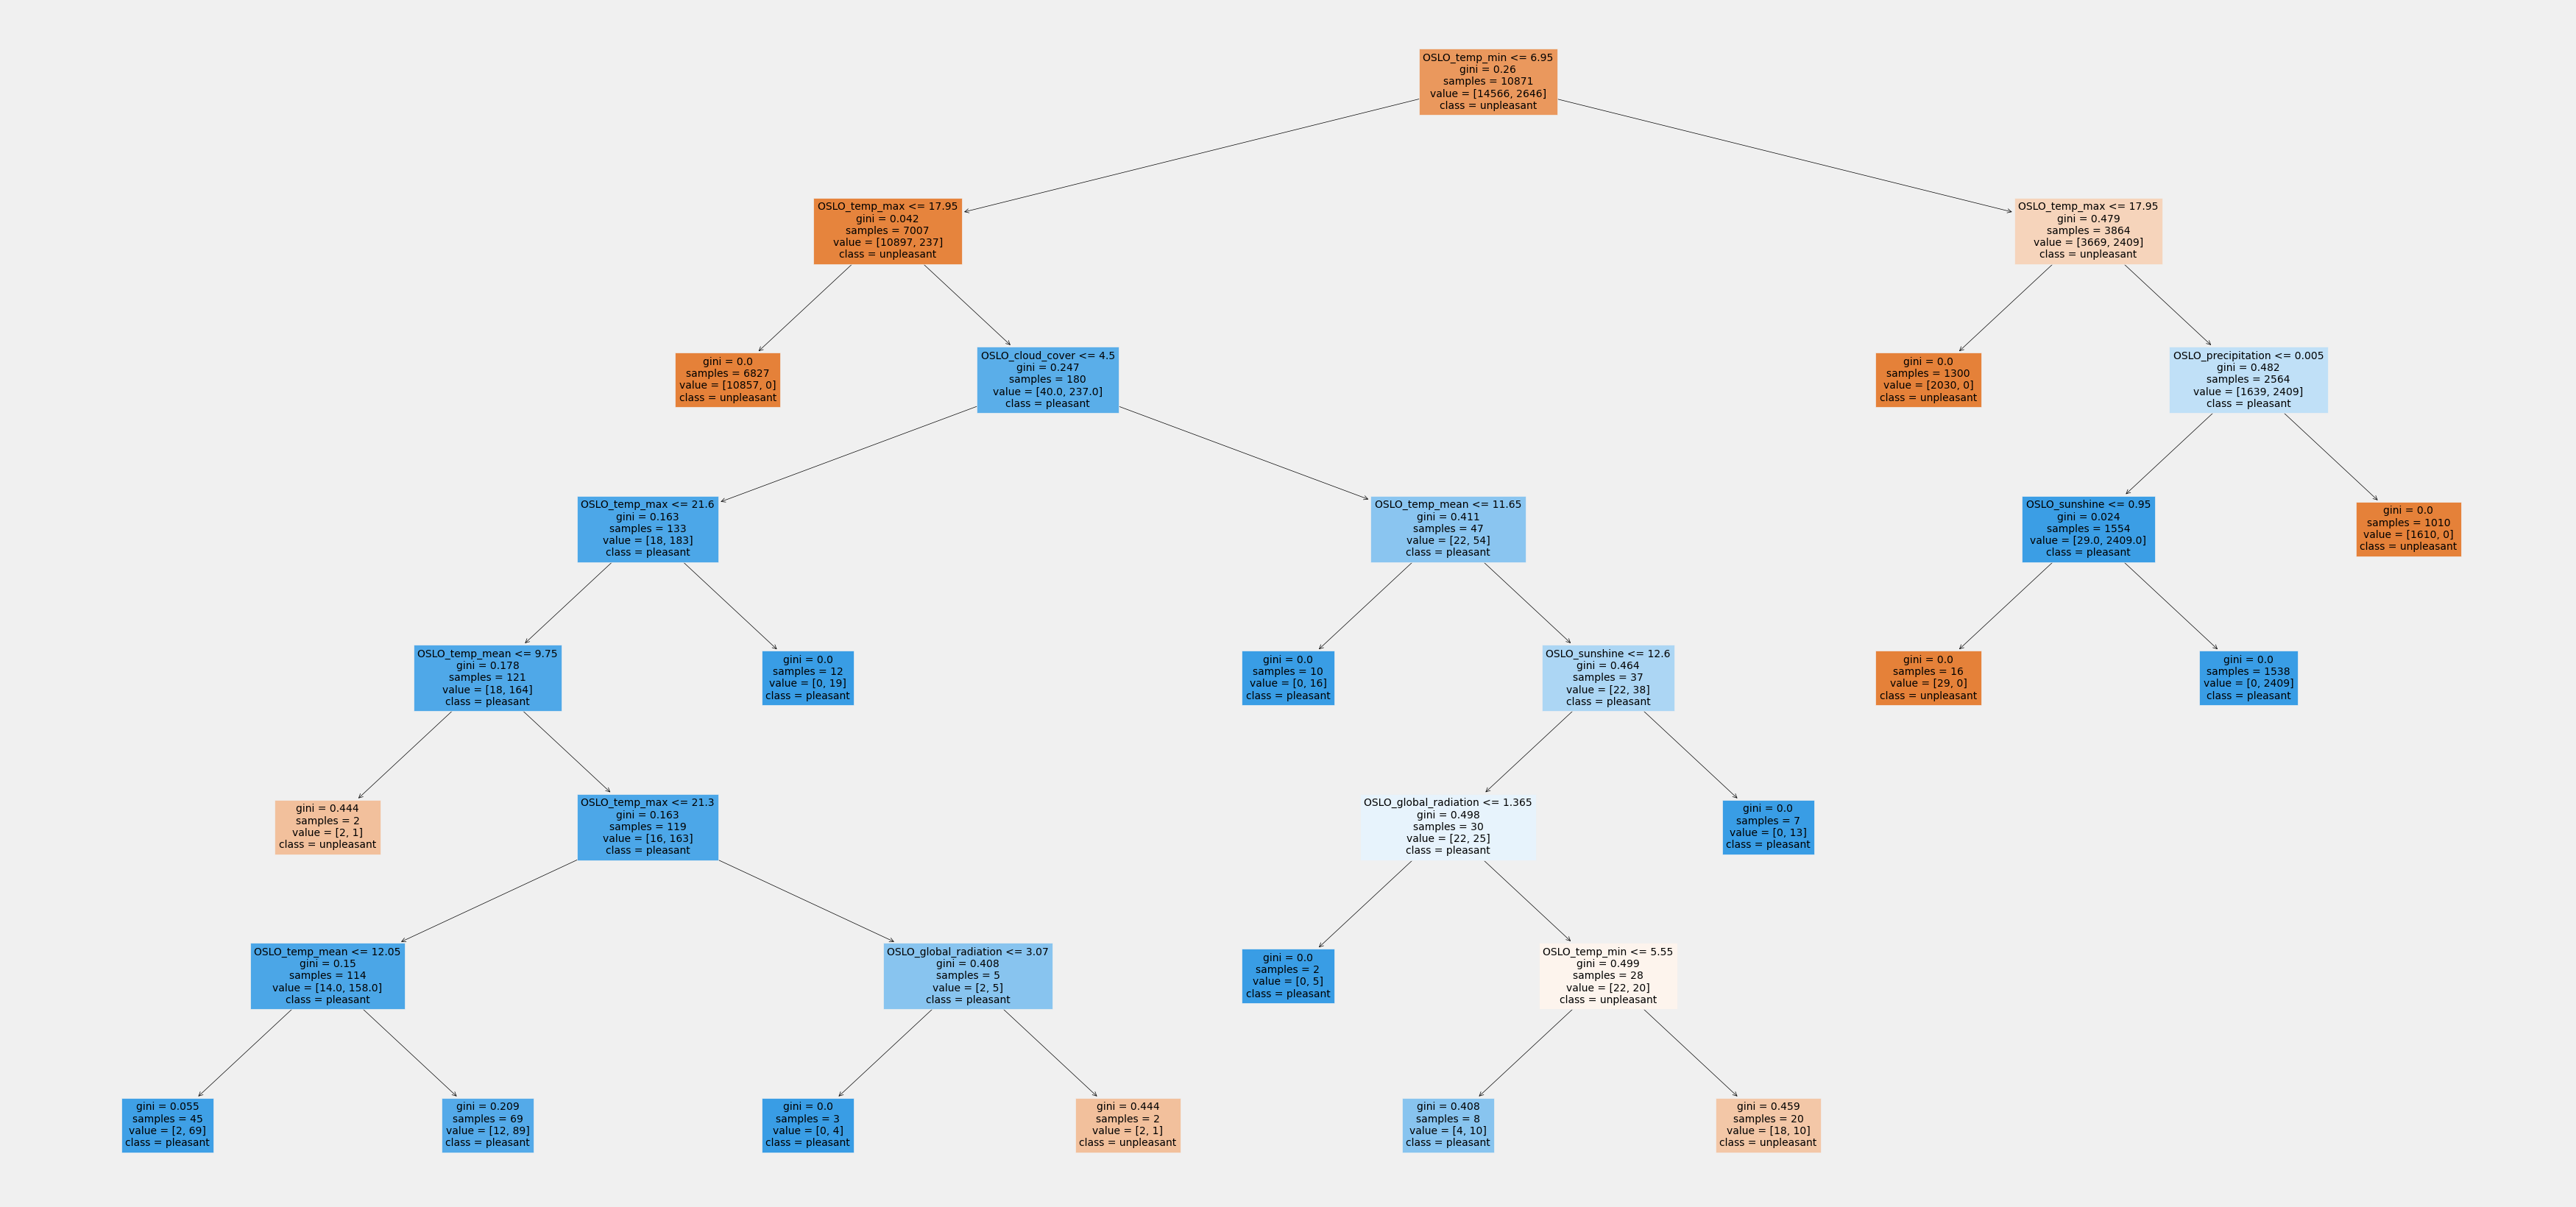

In [162]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
# Creates a figure object for the plot with a large width (40) and height (20) to ensure the decision tree is legible.

plot_tree(
    clf3.estimators_[6],          # Selects the 7th tree (index 6) from the trained Random Forest
    fontsize=10,                  # Sets the font size for text in the tree
    feature_names=df_oslo.columns,  # Labels tree splits with the feature names from the Oslo dataset
    class_names=['unpleasant', 'pleasant'],  # Maps the numerical labels to human-readable class names
    filled=True                   # Colors the nodes according to the majority class for better visualization
)

plt.show()
# Displays the decision tree plot inline.

In [164]:
# Save the currently displayed figure to a file

fig.savefig(
    os.path.join(path, 'optimized_random_forest_oslo.png'),  # File path and name where the figure will be saved
    bbox_inches='tight'  # Ensures that the saved figure tightly fits around all content, avoiding unnecessary white space
)

# Uncovering importances of features

In [171]:
# Retrieve feature importances from the trained Random Forest model
newarray = clf3.feature_importances_

# Print the shape of the feature importance array
print(clf3.feature_importances_.shape)

# Display the feature importance values
newarray

(9,)


array([0.02456874, 0.02647789, 0.01660871, 0.08142259, 0.24150572,
       0.0873615 , 0.15783971, 0.0702013 , 0.29401385])

In [173]:
# Retrieve feature importances from the trained Random Forest model
oslo_importance = clf3.feature_importances_

# Print all feature importance values
print("Feature Importances:", oslo_importance)

# Print the shape of the feature importance array
print(oslo_importance.shape)

Feature Importances: [0.02456874 0.02647789 0.01660871 0.08142259 0.24150572 0.0873615
 0.15783971 0.0702013  0.29401385]
(9,)


In [175]:
# Create a list of observation measurements
measurements = [
    'cloud_cover',       # Amount of cloud coverage (e.g., in oktas or %)
    'humidity',          # Relative humidity (%)
    'pressure',          # Atmospheric pressure (hPa)
    'global_radiation',  # Incoming solar radiation (W/m²)
    'precipitation',     # Rainfall or snowfall (mm)
    'sunshine',          # Duration of sunshine (hours)
    'temp_mean',         # Average temperature (°C)
    'temp_min',          # Minimum temperature (°C)
    'temp_max'           # Maximum temperature (°C)
]

In [177]:
# Create a DataFrame to associate observation measurements with their importances

oslo_importance = pd.DataFrame({
    'Measurement': measurements,  # Column containing the names of weather measurements
    'Importance': oslo_importance  # Column containing the corresponding feature importance values from the trained model
})

In [181]:
# Sort the DataFrame by the 'Importance' column in descending order
# This ensures that the most influential features appear first in any charts or tables
oslo_importance = oslo_importance.sort_values(by='Importance', ascending=False) 

# Print the sorted feature importances for review
print("Feature Importance:")
print(oslo_importance)

Feature Importance:
        Measurement  Importance
8          temp_max    0.294014
4     precipitation    0.241506
6         temp_mean    0.157840
5          sunshine    0.087361
3  global_radiation    0.081423
7          temp_min    0.070201
1          humidity    0.026478
0       cloud_cover    0.024569
2          pressure    0.016609


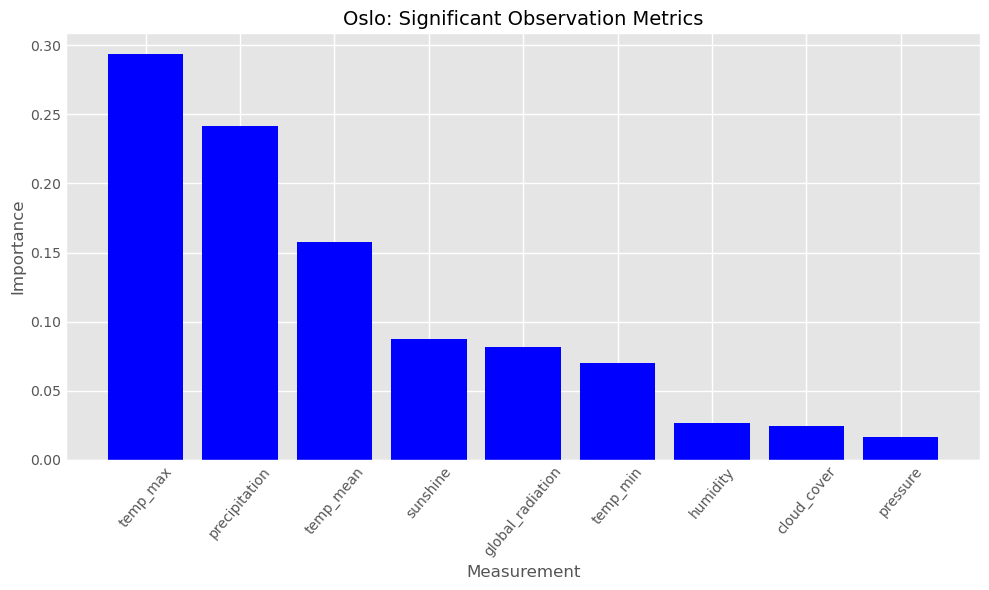

In [183]:
# Plot the importances of each measurement for Oslo
plt.style.use('ggplot')  # Set a clean ggplot style for the chart

plt_3 = plt.figure(figsize=(10, 6))  # Define the figure size for clarity

# Create a vertical bar chart: x-axis = measurement names, y-axis = feature importance values
plt.bar(oslo_importance['Measurement'], oslo_importance['Importance'], color='blue') 

# Rotate x-axis labels for better readability
plt.xticks(rotation=50, ha='center')  

# Label the axes
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)

# Set the chart title
plt.title("Oslo: Significant Observation Metrics", fontsize=14) 

# Adjust layout to prevent clipping of labels
plt.tight_layout()  

# Display the plot
plt.show()

In [185]:
# Save the figure to the specified path
plt_3.savefig(os.path.join(path, 'oslo_feature_importance.png'), bbox_inches='tight')